In [1]:
import warnings # Ignoreing all the warning
warnings.filterwarnings("ignore")
import os
import numpy
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score
%matplotlib inline

In [2]:
df=pd.read_csv('D:/personal/Python/heart-disease-uci/heart.csv')

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


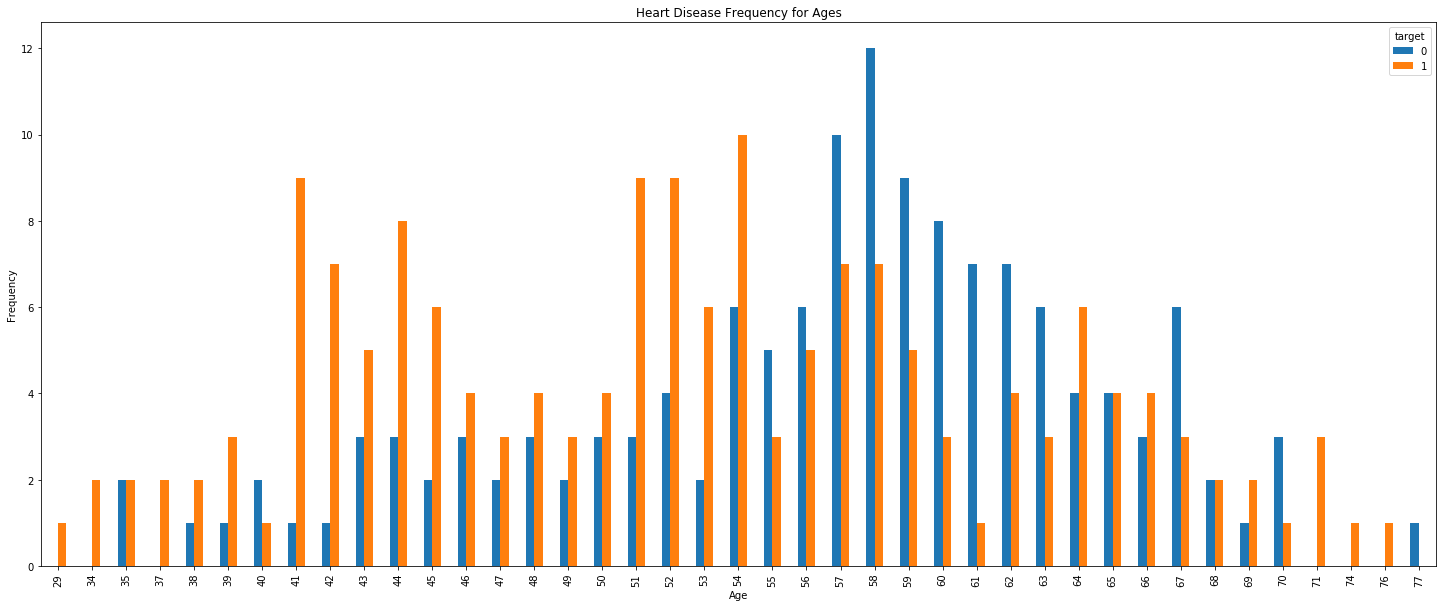

In [6]:
pd.crosstab(df['age'],df['target']).plot(kind="bar",figsize=(25,10))
pyplot.title('Heart Disease Frequency for Ages')
pyplot.xlabel('Age')
pyplot.ylabel('Frequency')
pyplot.show()

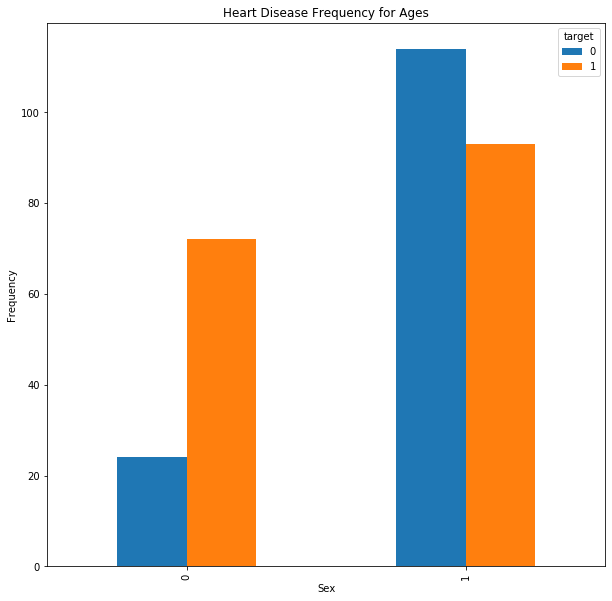

In [7]:
pd.crosstab(df['sex'],df['target']).plot(kind="bar",figsize=(10,10))
pyplot.title('Heart Disease Frequency for Ages')
pyplot.xlabel('Sex')
pyplot.ylabel('Frequency')
pyplot.show()

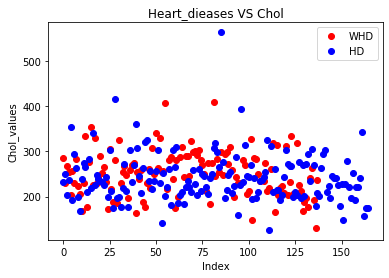

In [8]:
pyplot.plot(df[df['target']==0]['chol'].values,'ro',label='WHD')
pyplot.plot(df[df['target']!=0]['chol'].values,'bo',label='HD')
pyplot.xlabel('Index')
pyplot.ylabel('Chol_values')
pyplot.title('Heart_dieases VS Chol')
pyplot.legend()
pyplot.show()

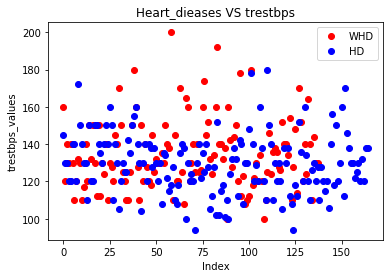

In [9]:
pyplot.plot(df[df['target']==0]['trestbps'].values,'ro',label='WHD')
pyplot.plot(df[df['target']!=0]['trestbps'].values,'bo',label='HD')
pyplot.xlabel('Index')
pyplot.ylabel('trestbps_values')
pyplot.title('Heart_dieases VS trestbps')
pyplot.legend()
pyplot.show()

In [10]:
Categorical_features=['sex','cp','exang','thal','ca','fbs']

In [11]:
X_features=list(df.columns)

In [12]:
X_features.remove('target')
print(X_features)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [13]:
encoded_df = pd.get_dummies(df[X_features],columns =Categorical_features, drop_first = True )


In [14]:
train_X, test_X, train_y, test_y = train_test_split(encoded_df,df['target'], train_size = 0.8, random_state = 42 ) 

In [15]:
len(train_X)
len(test_X)

61

In [16]:
# Intialization of classifier 
classifiers =[]
model1 = LogisticRegression()
classifiers.append(model1)
model2 = SVC()
classifiers.append(model2)
model3 = DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
model5 = AdaBoostClassifier()
classifiers.append(model5)

In [17]:
# List of models 
model_name = ['LogisticRegression','Support Vector Machine','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier']
Training_score ,Testing_score,TP,FP,FN,Precision,Recall,classifiers_list = [],[],[],[],[],[],[],[]

In [18]:
# Running for different classifier and Save scores for different classfiers into model

for i in range(0,len(classifiers)):
    
    clf = classifiers[i]
    clf.fit(train_X,train_y)
    pred_y = clf.predict(test_X)
    cm = confusion_matrix(test_y, pred_y)
    classifiers_list.append(model_name[i])
    Training_score.append(clf.score(train_X,train_y))
    Testing_score.append(clf.score(test_X,test_y))
    TP.append(cm[1][1])
    FP.append(cm[0][1])
    FN.append(cm[1][0])
    Precision.append( precision_score(test_y,pred_y))
    Recall.append(recall_score(test_y,pred_y))
    
    
Score_DF = pd.DataFrame()
Score_DF['classifiers'] = classifiers_list
Score_DF['Training_score'] = Training_score
Score_DF['Testing_score'] = Testing_score
Score_DF['True_positive'] = TP
Score_DF['False_positive'] = FP
Score_DF['False_negative'] = FN
Score_DF['Precision'] = Precision
Score_DF['Recall'] = Recall
Score_DF

,classifiers,Training_score,Testing_score,True_positive,False_positive,False_negative,Precision,Recall
0,LogisticRegression,0.863636,0.885246,27,2,5,0.931034,0.84375
1,Support Vector Machine,1.000000,0.524590,31,28,1,0.525424,0.96875
2,DecisionTreeClassifier,1.000000,0.721311,21,6,11,0.777778,0.65625
3,RandomForestClassifier,0.991736,0.803279,23,3,9,0.884615,0.71875
4,AdaBoostClassifier,0.929752,0.754098,22,5,10,0.814815,0.68750
